# Project 2: In-Depth Exploratory Data Analysis (EDA)
## Netflix Content Analysis 🎬

### Step 1: Setup - Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

### Step 2: Data Loading and Initial Inspection


In [ ]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 5.47 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
netflix_df= pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_df.shape

(7787, 12)

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
netflix_df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,False,False,False,False,False,False,False,False,False,False,False,False
7783,False,False,False,False,False,False,False,False,False,False,False,False
7784,False,False,False,True,False,True,False,False,False,False,False,False
7785,False,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


### Step 3: Data Cleaning and Transformation


In [ ]:
netflix_df['director']= netflix_df['director'].fillna("Unknown")
netflix_df['cast']=netflix_df['cast'].fillna("unknown")

In [ ]:
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
netflix_df['country']

,country
0,Brazil
1,Mexico
2,Singapore
3,United States
4,United States
...,...
7782,"Sweden, Czech Republic, United Kingdom, Denmar..."
7783,India
7784,NaN
7785,Australia


In [ ]:
mode_country=netflix_df['country'].mode()
netflix_df['country']=netflix_df['country'].fillna("mode_country")

In [ ]:
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
netflix_df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', dayfirst=False)

In [ ]:
netflix_df['date_added']

,date_added
0,2020-08-14
1,2016-12-23
2,2018-12-20
3,2017-11-16
4,2020-01-01
...,...
7782,2020-10-19
7783,2019-03-02
7784,2020-09-25
7785,2020-10-31


In [ ]:
netflix_df['year_added']=netflix_df['date_added'].dt.year

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [ ]:
netflix_df['month_added']=netflix_df['date_added'].dt.month

In [ ]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


In [ ]:
print("Missing values after cleaning:")
print(netflix_df.isnull().sum())
print("\nData types after transformation:")
print(netflix_df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


### Step 4: Exploratory Data Analysis & Visualization

#### 4.1 What is the distribution of content type?

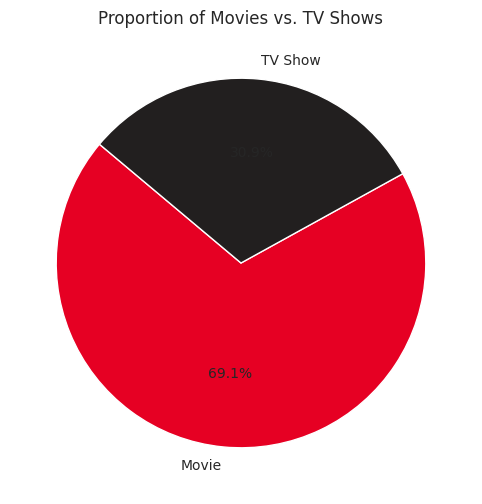

In [ ]:
plt.figure(figsize=(8, 6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e60023', '#221f1f'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

#### 4.2 How has content been added over time?

<Figure size 1400x800 with 0 Axes>

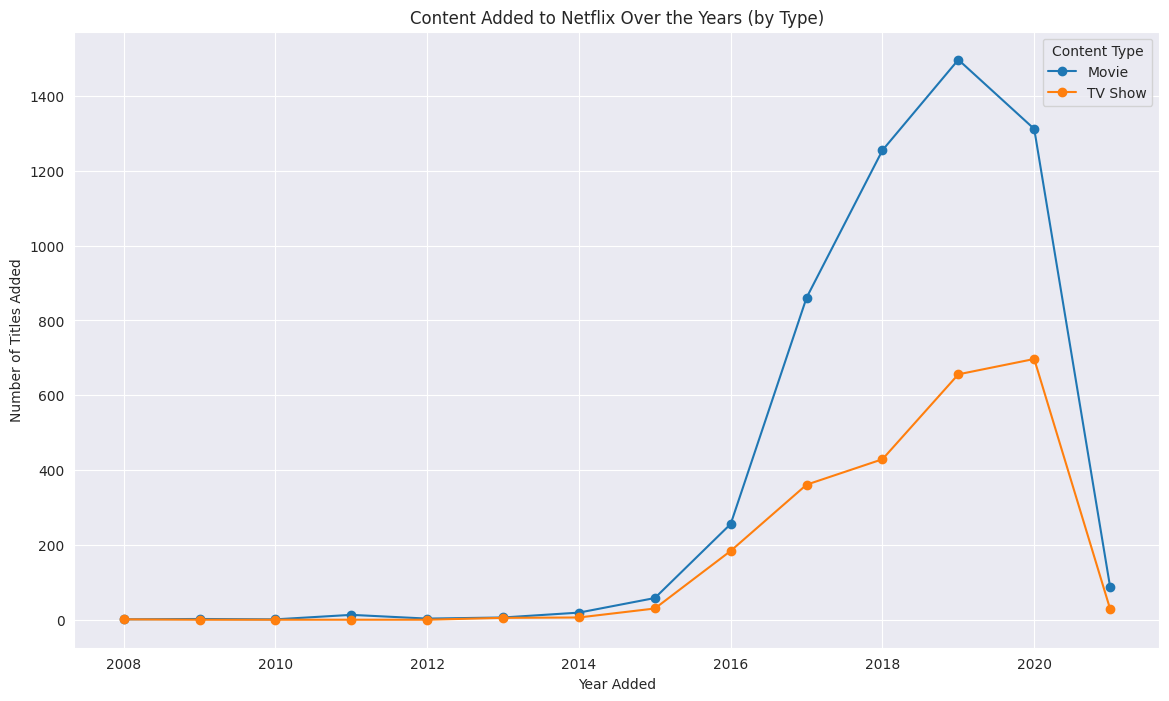

In [ ]:
content_over_time = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

In [ ]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


#### 4.3 What are the most popular genres?

In [ ]:
genres = netflix_df.assign(genre=netflix_df['listed_in'].str.split(', ')).explode('genre')

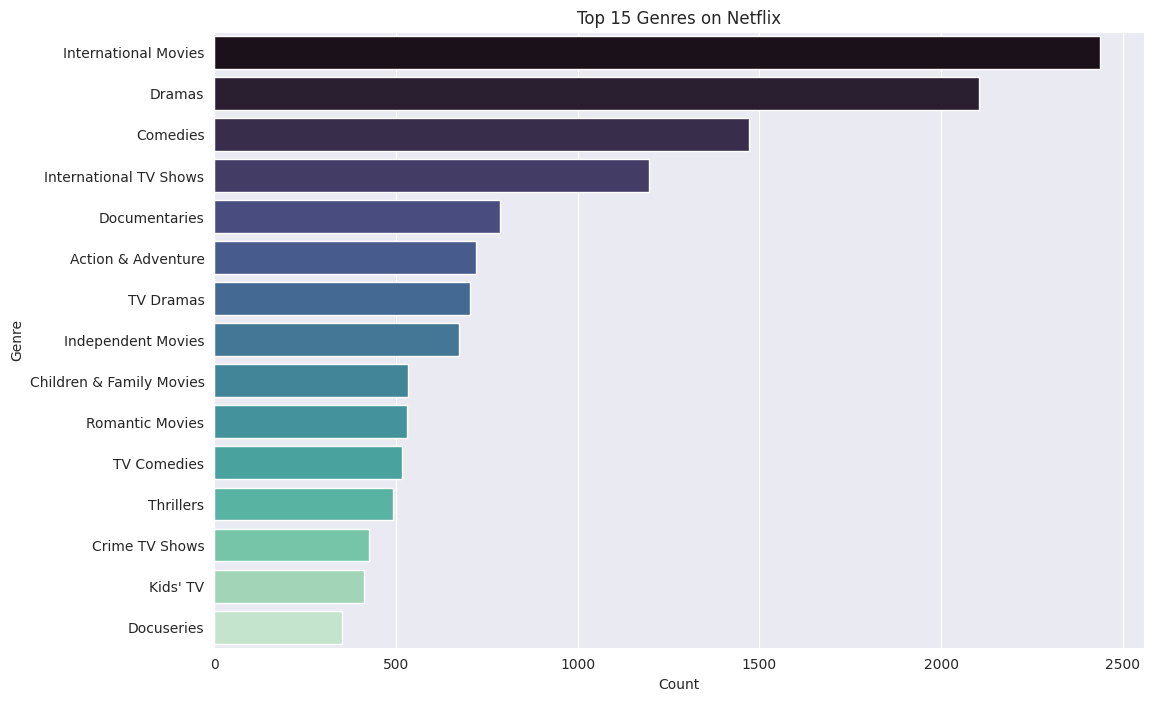

In [ ]:
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count']

top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

#### 4.4 What is the distribution of content duration?

In [ ]:
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [ ]:
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

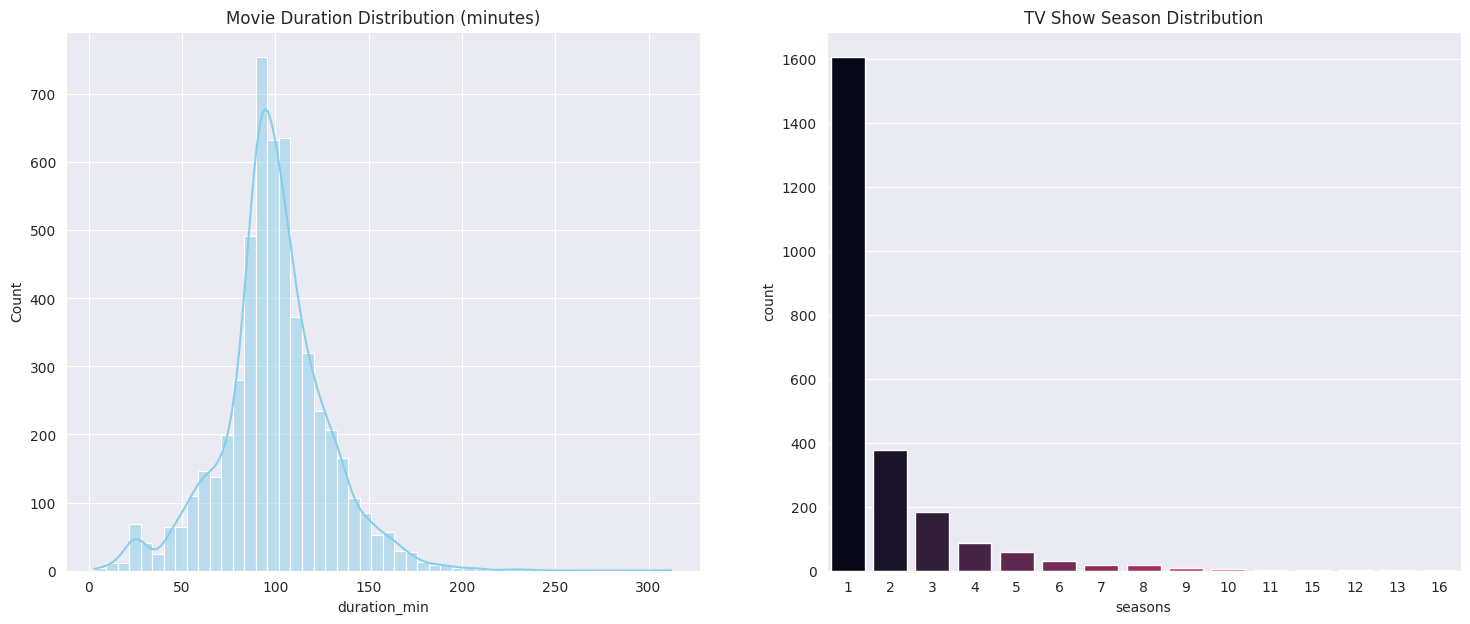

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')
plt.show()

#### 4.5 Where does the content come from? (Geographical Analysis)

In [ ]:
countries = netflix_df.assign(country=netflix_df['country'].str.split(', ')).explode('country')

In [ ]:
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count']

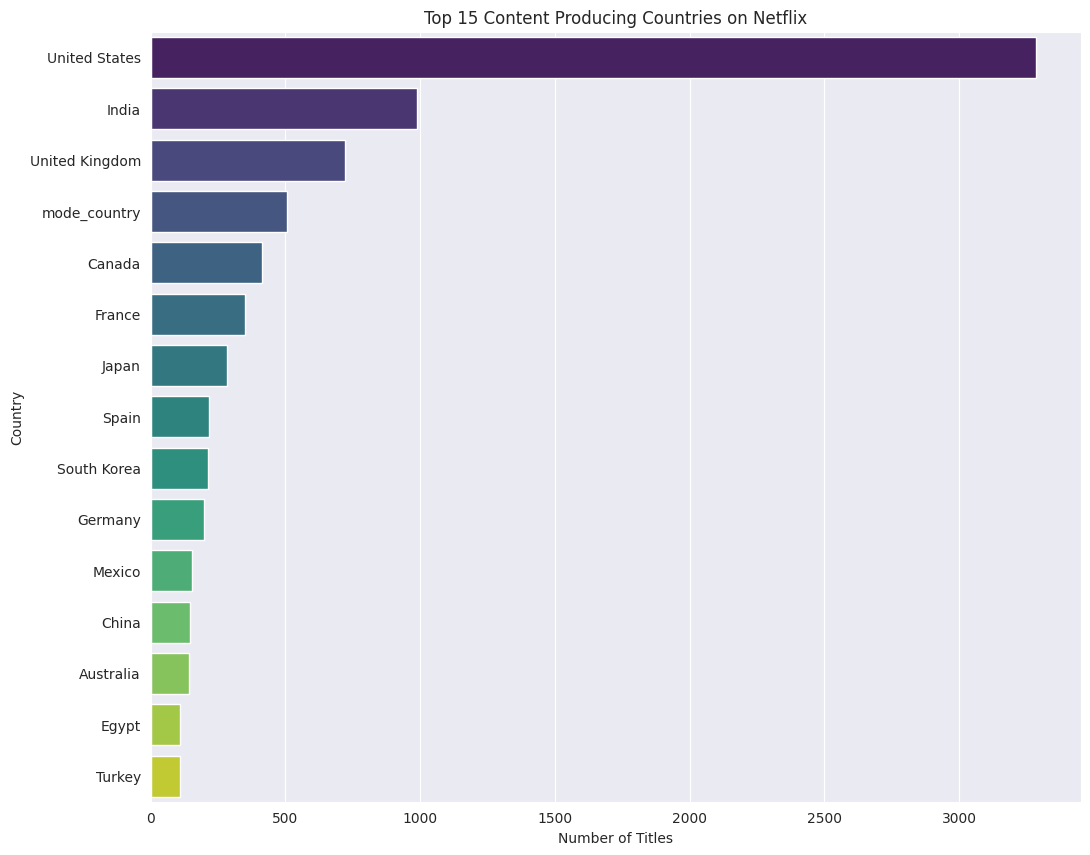

In [ ]:
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [ ]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


#### 4.6 What are the maturity ratings of the content?

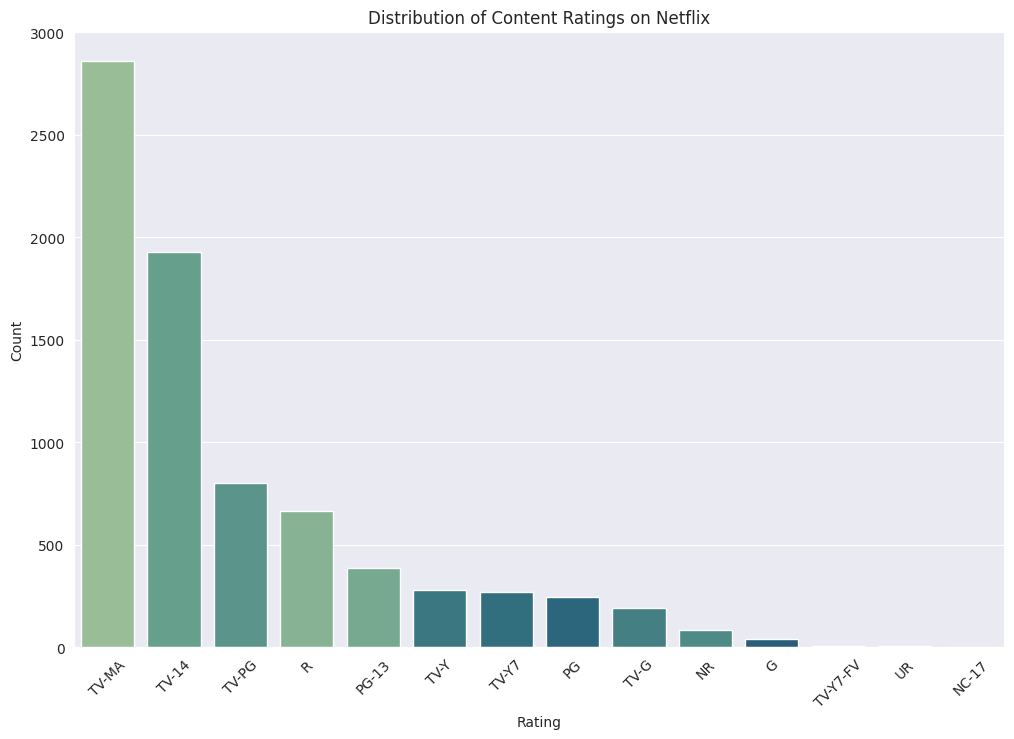

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Step 5: Feature Engineering - Content Freshness


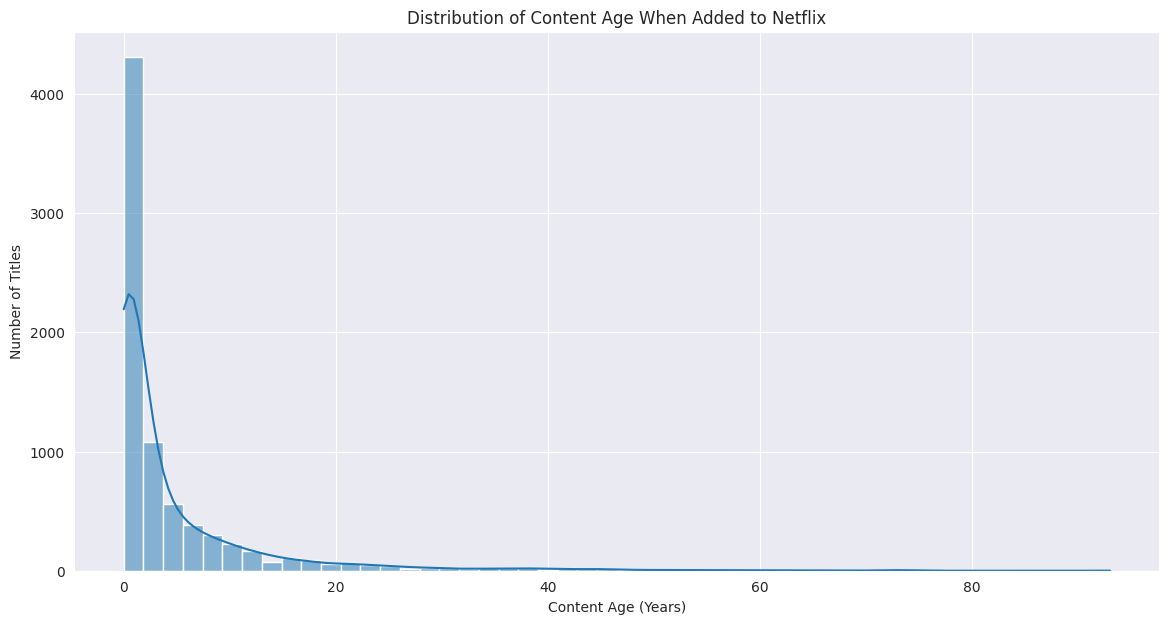

In [ ]:
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']
content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

### Step 6: Deeper Multivariate Analysis

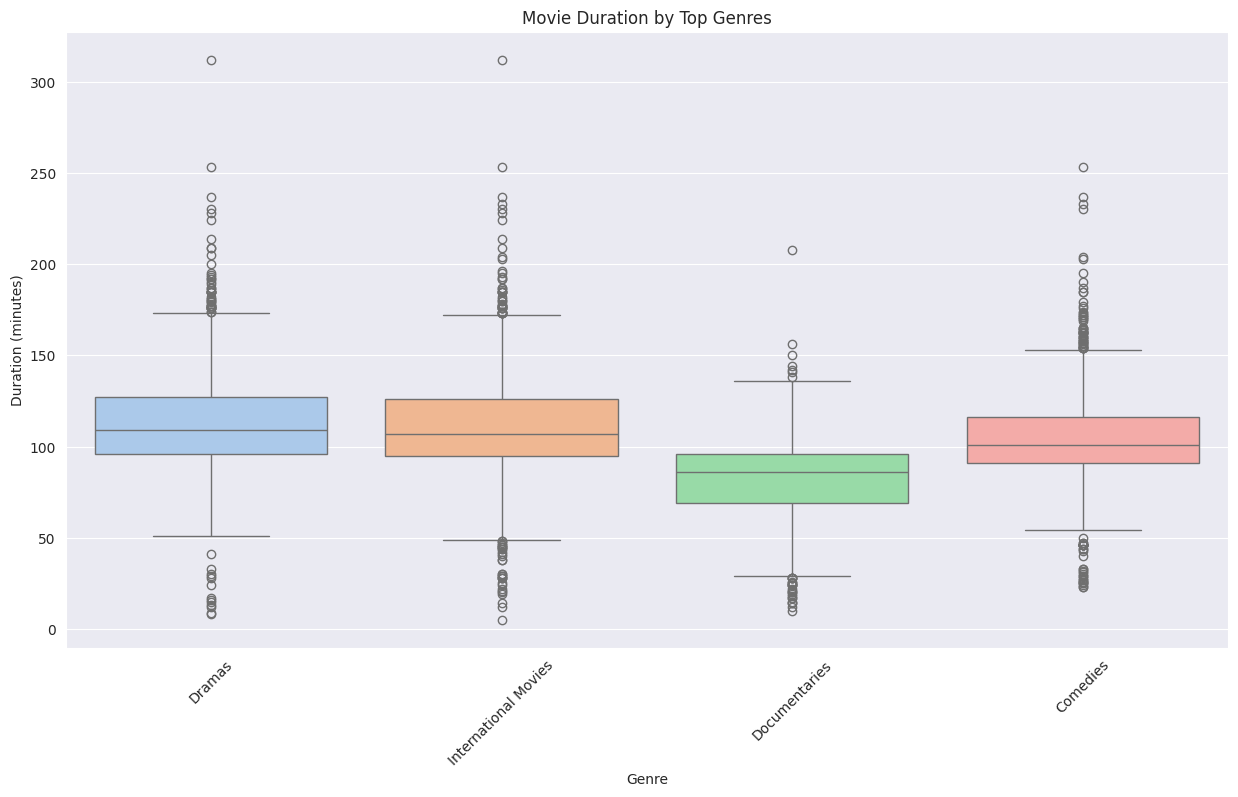

In [ ]:
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

### Step 7: Word Cloud from Content Descriptions


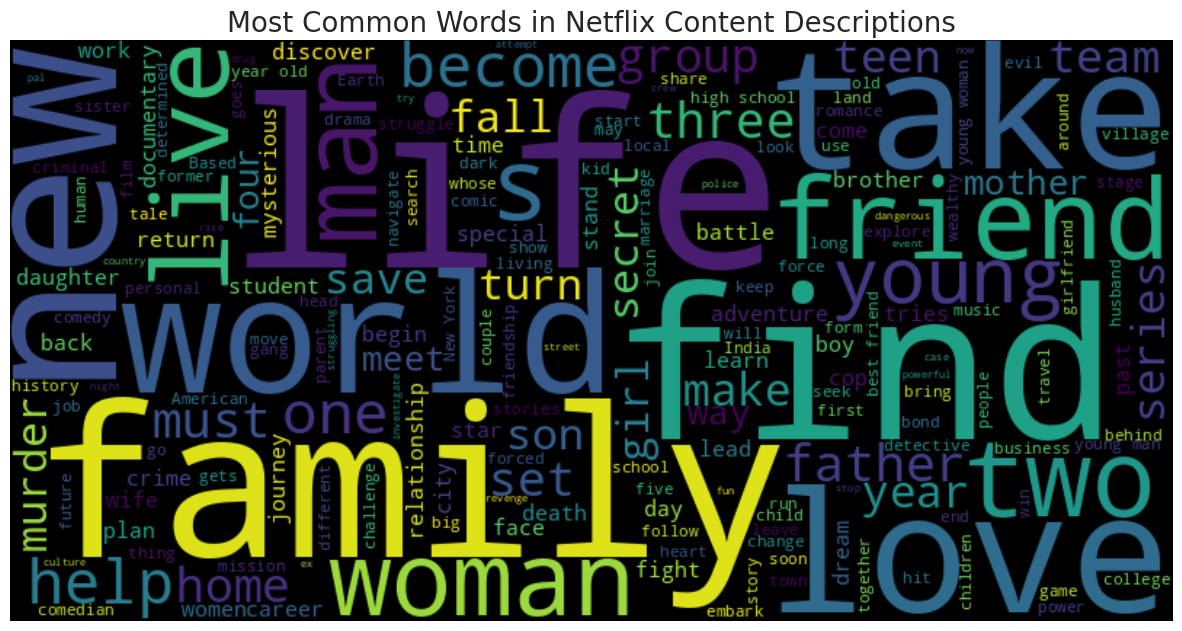

In [ ]:
from wordcloud import WordCloud
text = ' '.join(netflix_df['description'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

 Q1 :**How has the distribution of content ratings changed over time?**



<Figure size 1400x800 with 0 Axes>

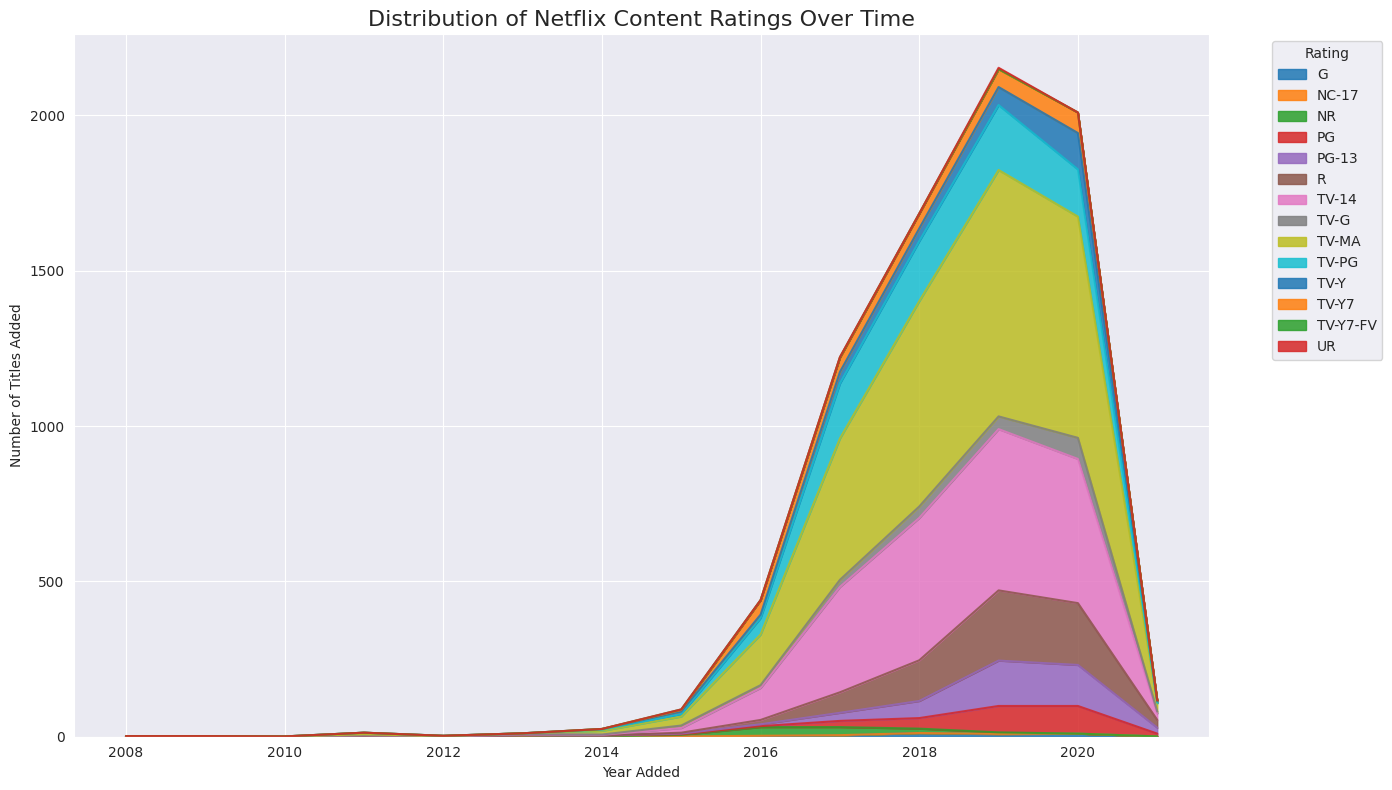

In [ ]:

rating_over_time = (
    netflix_df.groupby(['year_added', 'rating'])
    .size()
    .reset_index(name='count')
)


rating_pivot = rating_over_time.pivot(
    index='year_added',
    columns='rating',
    values='count'
).fillna(0)


rating_pivot = rating_pivot[rating_pivot.index >= 2008]


plt.figure(figsize=(14, 8))
rating_pivot.plot(kind='area', stacked=True, alpha=0.85, figsize=(14, 8))

plt.title('Distribution of Netflix Content Ratings Over Time', fontsize=16)
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Q2 : **Is there a relationship between content age and its type (Movie vs. TV Show)?**

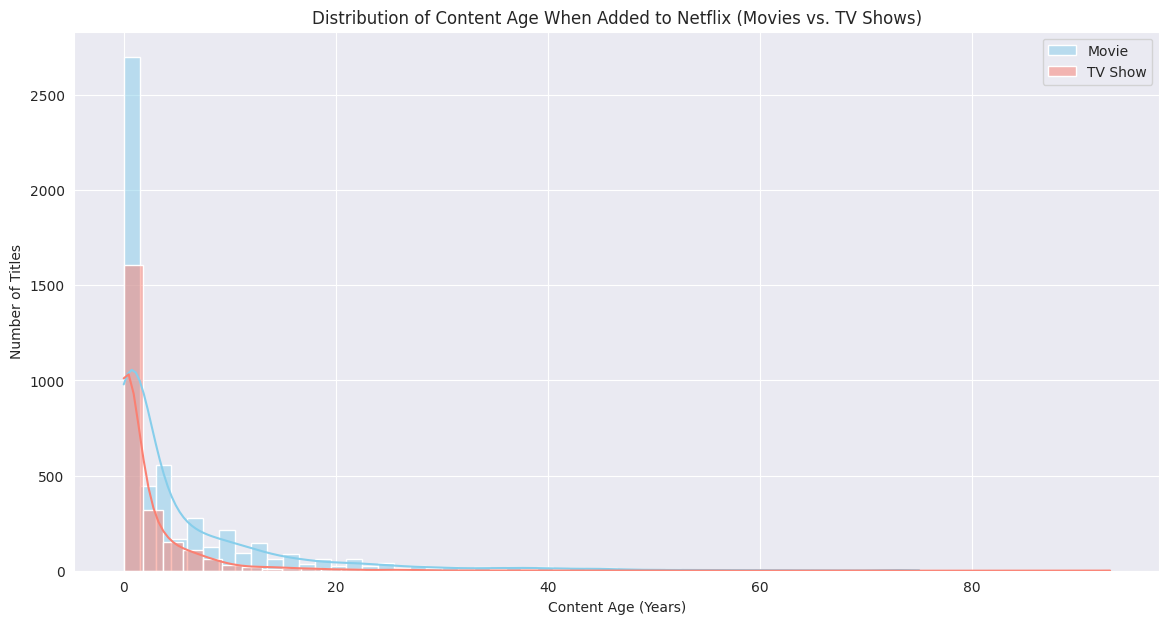

In [ ]:

movies_age = content_age[content_age['type'] == 'Movie']
tv_shows_age = content_age[content_age['type'] == 'TV Show']

# Plot the distribution of content age for movies and TV shows
plt.figure(figsize=(14, 7))
sns.histplot(data=movies_age, x='age_on_netflix', bins=50, kde=True, color='skyblue', label='Movie')
sns.histplot(data=tv_shows_age, x='age_on_netflix', bins=50, kde=True, color='salmon', label='TV Show')

plt.title('Distribution of Content Age When Added to Netflix (Movies vs. TV Shows)')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()

**Insight**: Both movies and TV shows have a peak at age 0 (new releases), but Netflix adds significantly more older movies than older TV shows, suggesting a larger library of older licensed movies.

Q3 : **Can we identify any trends in content production based on the release year vs. the year added to Netflix?**

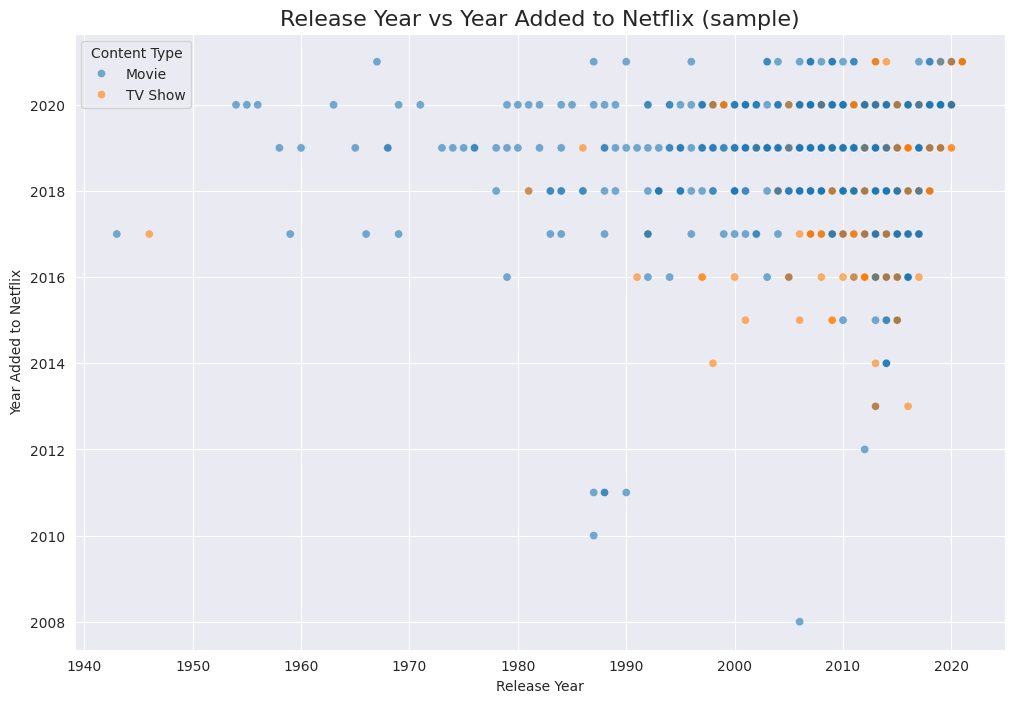

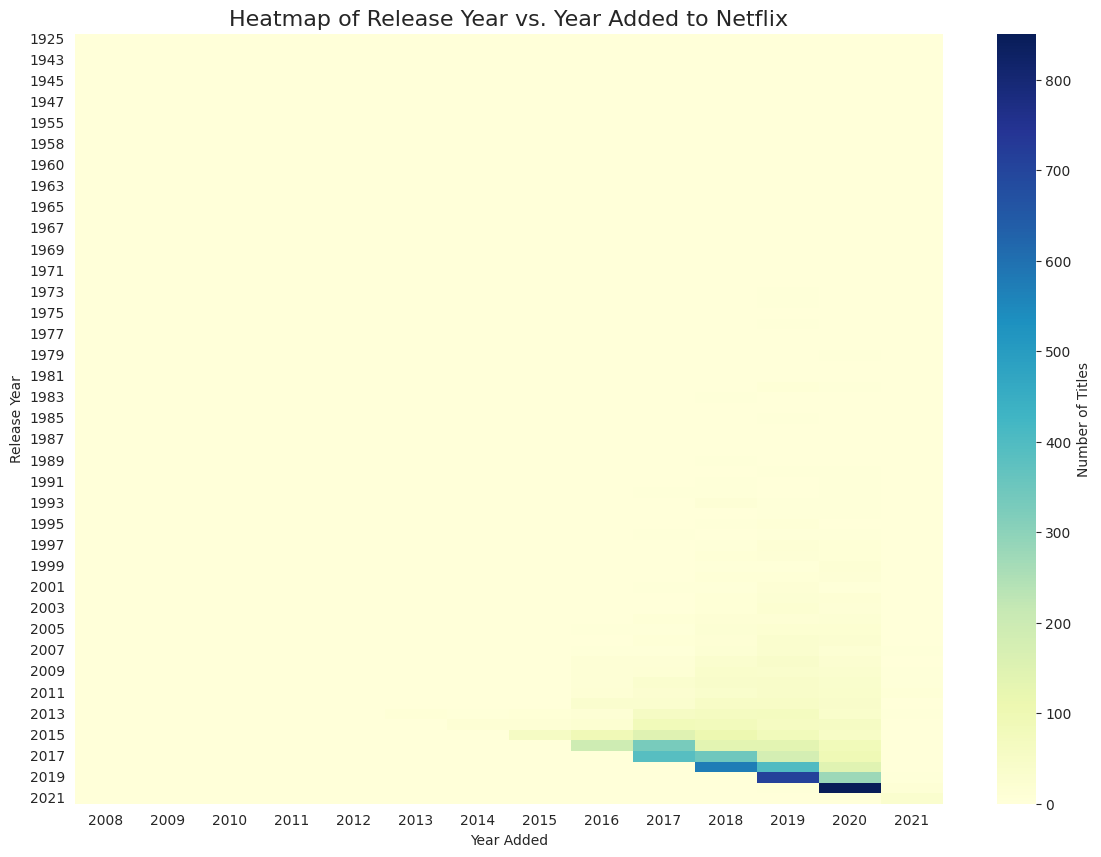

/tmp/ipython-input-156359230.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


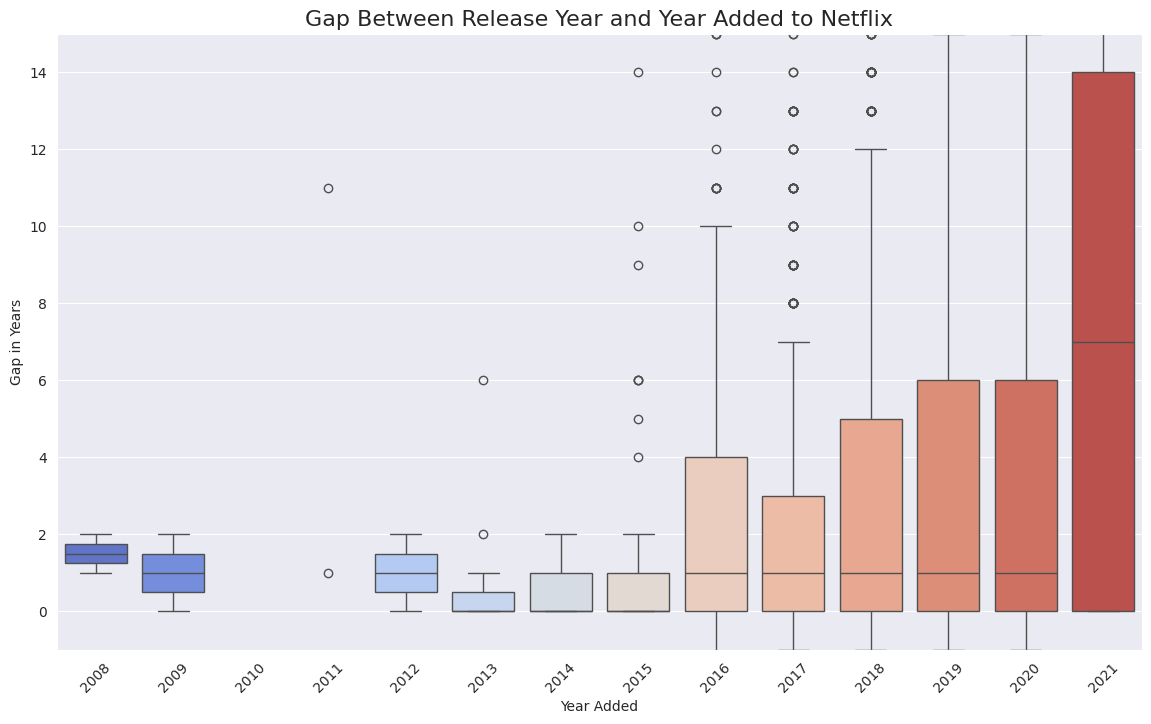

In [ ]:
# Create a filtered dataset with valid years
release_vs_add = netflix_df[
    (netflix_df['release_year'] > 1900) &
    (netflix_df['year_added'].notnull())
].copy()

# Calculate gap
release_vs_add['gap_years'] = release_vs_add['year_added'] - release_vs_add['release_year']

# Scatter plot: Release Year vs. Year Added
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=release_vs_add.sample(2000, random_state=42),  # sample for clarity
    x='release_year',
    y='year_added',
    hue='type',
    alpha=0.6
)
plt.title('Release Year vs Year Added to Netflix (sample)', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.legend(title='Content Type')
plt.show()

# Heatmap of counts
heatmap_data = (
    release_vs_add.groupby(['release_year', 'year_added'])
    .size()
    .reset_index(name='count')
    .pivot(index='release_year', columns='year_added', values='count')
    .fillna(0)
)

plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    cbar_kws={'label': 'Number of Titles'}
)
plt.title('Heatmap of Release Year vs. Year Added to Netflix', fontsize=16)
plt.xlabel('Year Added')
plt.ylabel('Release Year')
plt.show()

# Gap distribution over time
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=release_vs_add,
    x='year_added',
    y='gap_years',
    palette='coolwarm'
)
plt.ylim(-1, 15)  # focus on main range
plt.title('Gap Between Release Year and Year Added to Netflix', fontsize=16)
plt.xlabel('Year Added')
plt.ylabel('Gap in Years')
plt.xticks(rotation=45)
plt.show()

**Insights:** Netflix primarily adds recently released content, but also acquires older licensed content, and the time gap between release and adding licensed content seems to be increasing slightly.

Q4 : **What are the most common word pairs or phrases in content descriptions?**

                    bigram  count
35536          high school    133
86009             year old    130
86438            young man    103
86571          young woman     98
52837             new york     86
69691           small town     59
6741           best friend     51
79495           true story     48
71691        stand special     47
85635            world war     46
6742          best friends     45
5842            based true     43
21322  documentary follows     38
45863          los angeles     38
83008               war ii     38
26363           falls love     37
86243            york city     35
21373   documentary series     35
64119            road trip     33
67367        serial killer     32


/tmp/ipython-input-1896803694.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


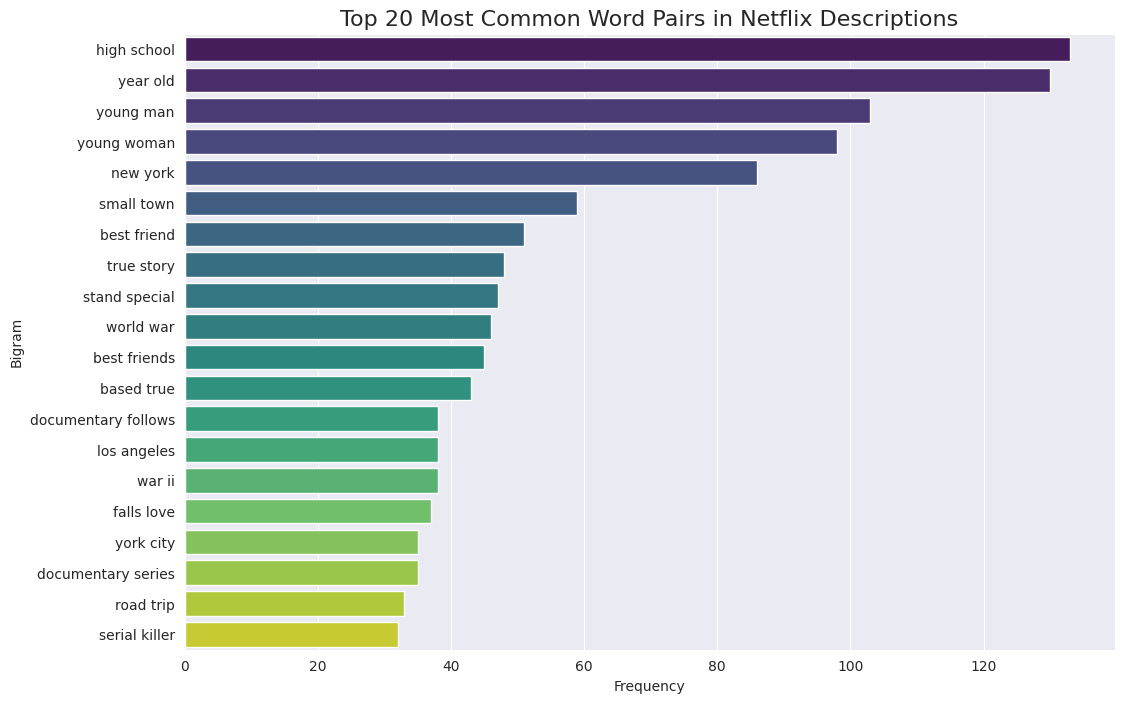

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Drop missing descriptions
desc_corpus = netflix_df['description'].dropna()

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(desc_corpus)

# Sum frequencies
bigram_counts = X.toarray().sum(axis=0)
bigram_freq = dict(zip(vectorizer.get_feature_names_out(), bigram_counts))

# Convert to DataFrame
bigram_df = pd.DataFrame(bigram_freq.items(), columns=['bigram', 'count'])
bigram_df = bigram_df.sort_values(by='count', ascending=False).head(20)

# Display top 20 bigrams
print(bigram_df)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=bigram_df,
    x='count',
    y='bigram',
    palette='viridis'
)
plt.title('Top 20 Most Common Word Pairs in Netflix Descriptions', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

**Insight**: The most common word pairs in Netflix descriptions highlight themes of personal relationships, age, and location, with phrases like "high school," "year old," "young man," "young woman," and "new york" being prominent.

Q5 : **Who are the top directors on Netflix?**

Top 15 Directors on Netflix (excluding 'Unknown'):
                  director  count
1   Raúl Campos, Jan Suter     18
2             Marcus Raboy     16
3                Jay Karas     14
4      Cathy Garcia-Molina     13
5          Martin Scorsese     12
6          Youssef Chahine     12
7              Jay Chapman     12
8         Steven Spielberg     10
9             David Dhawan      9
10        Robert Rodriguez      8
11       Quentin Tarantino      8
12          Kunle Afolayan      8
13              Johnnie To      8
14             Hakan Algül      8
15         Shannon Hartman      8


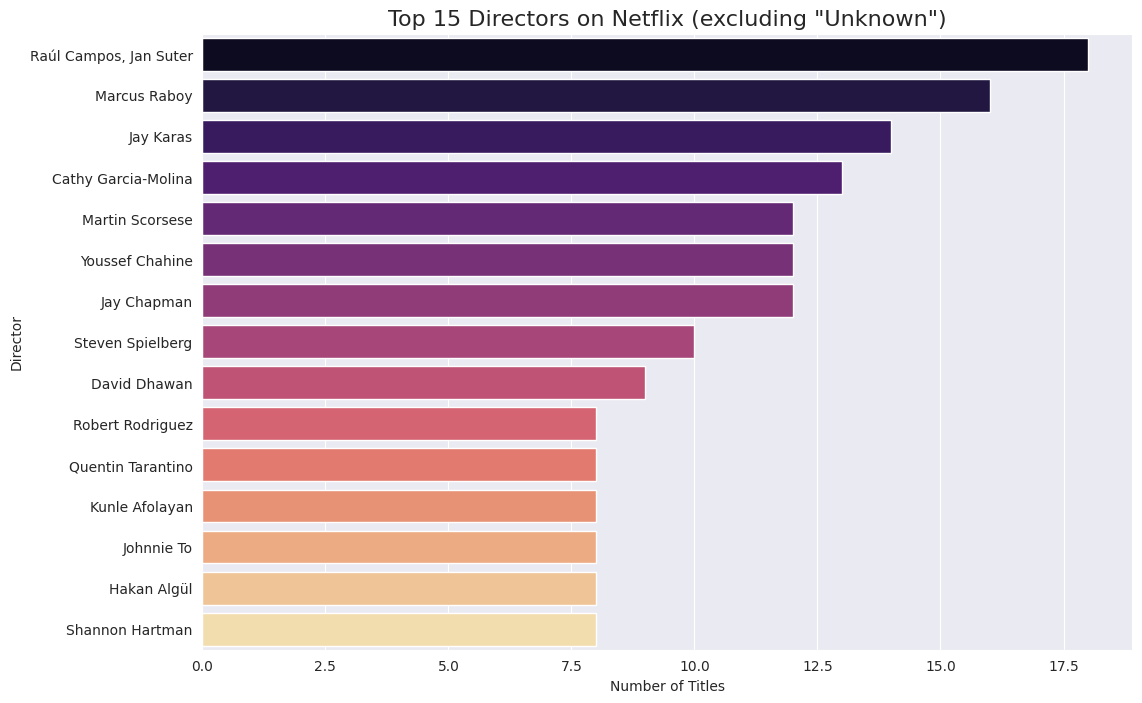

In [ ]:
# Count the number of titles per director
top_directors = netflix_df['director'].value_counts().reset_index()
top_directors.columns = ['director', 'count']

# Exclude the 'Unknown' category
top_directors = top_directors[top_directors['director'] != 'Unknown']

# Select the top 15 directors for visualization
top_directors_plot = top_directors.head(15)

# Display the top directors
print("Top 15 Directors on Netflix (excluding 'Unknown'):")
print(top_directors_plot)

# Plot the top directors
plt.figure(figsize=(12, 8))
sns.barplot(y='director', x='count', data=top_directors_plot, palette='magma', hue='director', legend=False)
plt.title('Top 15 Directors on Netflix (excluding "Unknown")', fontsize=16)
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

**Insight**: Certain directors like Raúl Campos, Jan Suter, Marcus Raboy, and Jay Karas have a notable number of titles, indicating either significant acquisitions or commissioned work from them.